In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [47]:
# Load the dataset
from sklearn.model_selection import train_test_split


df = pd.read_csv('/Users/ajitesh/.cache/kagglehub/datasets/mdsultanulislamovi/student-stress-monitoring-datasets/versions/1/StressLevelDataset.csv')

print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())



x_train, x_test, y_train, y_test = train_test_split(
    df.drop('stress_level', axis=1),
    df['stress_level'],
    test_size=0.2,
    random_state=42
)

print(f"\nTraining set shape: {x_train.shape}")
print(f"Testing set shape: {x_test.shape}")


# print(df if df["stress_level"].iloc[0] < 3 else "Stress level exceeds 3, showing firstrows:")

DATASET OVERVIEW
Dataset Shape: (1100, 21)
Total Records: 1100
Total Features: 21

Column Names:
['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']

Training set shape: (880, 20)
Testing set shape: (220, 20)


In [31]:
# Create a new model with explicit layer definitions as requested
from keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from keras.models import Model
import numpy as np


input_layer = Input(shape=(x_train.shape[1],), name='input_layer')
hidden_layer = Dense(64, activation='relu', name='hidden_layer')(input_layer)
# dropout_layer = Dropout(0.3, name='dropout_layer')(hidden_layer)
output_layer = Dense(1, activation='linear', name='output_layer')(hidden_layer)

model_new = Model(inputs=input_layer, outputs=output_layer, name='StressLevelModel')
model_new.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])
print("Model Architecture:")
model_new.summary()

Model Architecture:


Model: "StressLevelModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer (Dense)            │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Visualize model architecture
from keras.utils import plot_model
plot_model(model_new, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [33]:
history = model_new.fit(x_train, y_train, epochs=10, batch_size=1, validation_split=0.2)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5000 - loss: 0.7507 - mae: 0.5735 - val_accuracy: 0.4943 - val_loss: 0.3267 - val_mae: 0.4657
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5000 - loss: 0.7507 - mae: 0.5735 - val_accuracy: 0.4943 - val_loss: 0.3267 - val_mae: 0.4657
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5426 - loss: 0.3187 - mae: 0.3986 - val_accuracy: 0.5511 - val_loss: 0.3602 - val_mae: 0.4673
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5426 - loss: 0.3187 - mae: 0.3986 - val_accuracy: 0.5511 - val_loss: 0.3602 - val_mae: 0.4673
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5639 - loss: 0.2742 - mae: 0.3818 - val_accuracy: 0.5795 - val_loss: 0.2303 - val_mae: 0.3189
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5639 - loss: 0.2742 - mae: 0.3818 - val_accuracy: 0.5795 - val_loss: 0.2303 - val_mae: 0.3189
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 

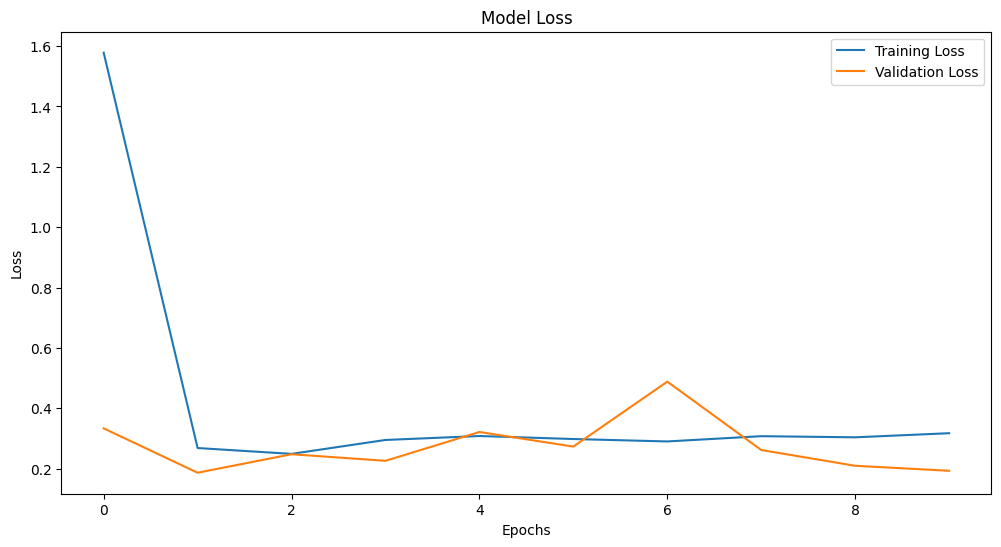

In [29]:
#plot the hostory graph
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
index = 16

sample = x_test.iloc[index].values.reshape(1, -1)
pred = model_new.predict(sample)
print(f"Prediction for the seventh test sample: {pred[0][0]}")
print(f"Actual stress level for the seventh test sample: {y_test.iloc[index]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction for the seventh test sample: 0.5685861706733704
Actual stress level for the seventh test sample: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction for the seventh test sample: 0.5685861706733704
Actual stress level for the seventh test sample: 0


In [ ]:
# Function to create intermediate models for layer output visualization
def create_layer_output_models(model):
    """Create models that output intermediate layer results"""
    layer_outputs = {}
    
    for i, layer in enumerate(model.layers):
        if layer.name != 'input_layer':  # Skip input layer
            # Create a model that outputs up to this layer
            intermediate_model = Model(inputs=model.input, outputs=layer.output)
            layer_outputs[layer.name] = intermediate_model
    
    return layer_outputs

# Function to visualize outputs from each layer
def visualize_layer_outputs(model, sample_data, layer_output_models, sample_indices=[0, 1, 2]):
    """Visualize outputs from each layer for sample data points"""
    
    print("=" * 80)
    print("LAYER OUTPUT VISUALIZATION")
    print("=" * 80)
    
    for sample_idx in sample_indices:
        print(f"\n--- Sample {sample_idx + 1} ---")
        sample_input = sample_data[sample_idx:sample_idx+1]  # Keep batch dimension
        
        print(f"Input shape: {sample_input.shape}")
        print(f"Input values (first 10): {sample_input.flatten()[:10]}")
        
        for layer_name, layer_model in layer_output_models.items():
            output = layer_model.predict(sample_input, verbose=0)
            print(f"\n{layer_name}:")
            print(f"  Output shape: {output.shape}")
            print(f"  Output values: {output.flatten()}")
            
            # For hidden layers, show statistics
            if 'hidden' in layer_name.lower():
                print(f"  Mean: {np.mean(output):.4f}")
                print(f"  Std: {np.std(output):.4f}")
                print(f"  Min: {np.min(output):.4f}")
                print(f"  Max: {np.max(output):.4f}")
                print(f"  Active nodes (>0): {np.sum(output > 0)} / {output.shape[-1]}")

# Function to visualize individual node outputs from hidden layers
def visualize_hidden_nodes(model, sample_data, layer_output_models, sample_indices=[0, 1, 2]):
    """Visualize individual node outputs from hidden layers"""
    
    print("\n" + "=" * 80)
    print("HIDDEN LAYER NODE ANALYSIS")
    print("=" * 80)
    
    for layer_name, layer_model in layer_output_models.items():
        if 'hidden' in layer_name.lower():
            print(f"\n--- {layer_name.upper()} NODES ---")
            
            # Get outputs for all sample indices
            outputs = []
            for sample_idx in sample_indices:
                sample_input = sample_data[sample_idx:sample_idx+1]
                output = layer_model.predict(sample_input, verbose=0)
                outputs.append(output.flatten())
            
            outputs = np.array(outputs)  # Shape: (num_samples, num_nodes)
            
            # Create visualization
            plt.figure(figsize=(15, 6))
            
            # Plot 1: Heatmap of node activations
            plt.subplot(1, 3, 1)
            sns.heatmap(outputs, annot=True, fmt='.3f', cmap='RdYlBu_r', 
                       xticklabels=[f'Node_{i+1}' for i in range(outputs.shape[1])],
                       yticklabels=[f'Sample_{i+1}' for i in range(outputs.shape[0])])
            plt.title(f'{layer_name} - Node Activations')
            plt.ylabel('Samples')
            plt.xlabel('Nodes')
            
            # Plot 2: Node activation distribution
            plt.subplot(1, 3, 2)
            plt.boxplot([outputs[:, i] for i in range(outputs.shape[1])], 
                       labels=[f'N{i+1}' for i in range(outputs.shape[1])])
            plt.title(f'{layer_name} - Activation Distribution')
            plt.ylabel('Activation Value')
            plt.xlabel('Node')
            plt.xticks(rotation=45)
            
            # Plot 3: Average activation per node
            plt.subplot(1, 3, 3)
            mean_activations = np.mean(outputs, axis=0)
            bars = plt.bar(range(len(mean_activations)), mean_activations, 
                          color=['red' if x < 0 else 'blue' for x in mean_activations])
            plt.title(f'{layer_name} - Average Activations')
            plt.ylabel('Mean Activation')
            plt.xlabel('Node')
            plt.xticks(range(len(mean_activations)), [f'N{i+1}' for i in range(len(mean_activations))], rotation=45)
            plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
            
            plt.tight_layout()
            plt.savefig(f'{layer_name}_node_analysis.png', dpi=300, bbox_inches='tight')
            plt.show()
            
            # Print node statistics
            print(f"\nNode Statistics for {layer_name}:")
            for i in range(outputs.shape[1]):
                node_values = outputs[:, i]
                print(f"  Node {i+1}: Mean={np.mean(node_values):.4f}, "
                      f"Std={np.std(node_values):.4f}, "
                      f"Min={np.min(node_values):.4f}, "
                      f"Max={np.max(node_values):.4f}")

print("Layer visualization functions created successfully!")

In [ ]:
# Prepare the data for the new model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train_split, y_test = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Scale the features
scaler_new = StandardScaler()
X_train_scaled = scaler_new.fit_transform(X_train)
X_test_scaled = scaler_new.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Target distribution in training set:")
print(pd.Series(y_train_split).value_counts().sort_index())

# Train the new model
print("\nTraining the new model...")
history_new = model_new.fit(
    X_train_scaled, y_train_split, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history_new.history['loss'], label='Training Loss', color='blue')
plt.plot(history_new.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(history_new.history['mae'], label='Training MAE', color='blue')
plt.plot(history_new.history['val_mae'], label='Validation MAE', color='orange')
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
# Make predictions
y_pred = model_new.predict(X_test_scaled)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.savefig('model_training_results.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nModel training completed!")
print(f"Final training loss: {history_new.history['loss'][-1]:.4f}")
print(f"Final validation loss: {history_new.history['val_loss'][-1]:.4f}")
print(f"Final training MAE: {history_new.history['mae'][-1]:.4f}")
print(f"Final validation MAE: {history_new.history['val_mae'][-1]:.4f}")

In [ ]:
# Create intermediate models for layer output visualization
layer_output_models = create_layer_output_models(model_new)

print("Created intermediate models for layers:")
for layer_name in layer_output_models.keys():
    print(f"  - {layer_name}")

# Select sample data points from different stress levels
sample_indices = []
for stress_level in sorted(y_test.unique()):
    # Get first occurrence of each stress level
    idx = y_test[y_test == stress_level].index[0]
    # Convert to position in test set
    test_position = list(y_test.index).index(idx)
    sample_indices.append(test_position)

print(f"\nSelected sample indices: {sample_indices}")
print("Corresponding stress levels:", [y_test.iloc[i] for i in sample_indices])

# Visualize layer outputs
visualize_layer_outputs(model_new, X_test_scaled, layer_output_models, sample_indices)

# Visualize individual node outputs from hidden layers
visualize_hidden_nodes(model_new, X_test_scaled, layer_output_models, sample_indices)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mdsultanulislamovi/student-stress-monitoring-datasets")

print("Path to dataset files:", path)

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Comprehensive Analysis of Stress Level Dataset for Machine Learning

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
# Custom color palettes - choose one or mix them
blue_palette = sns.color_palette("Blues_r", n_colors=8)
green_palette = sns.color_palette("Greens_r", n_colors=8)
orange_palette = sns.color_palette("Oranges_r", n_colors=8)
# Set a blue-green palette as default
sns.set_palette("viridis")

# =============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

# Load the dataset
import os
csv_path = os.path.join(path, "StressLevelDataset.csv")
df = pd.read_csv(csv_path)

print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")

print(f"Total Features: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())



In [ ]:
from tensorflow import keras
from keras.models import Sequential


x_train = df.drop(columns=['stress_level'])
y_train = df['stress_level']

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

In [ ]:
from keras.layers import Input, Dense, Dropout, BatchNormalization, Activation

model = Sequential()

model.add(Input(shape=(df.shape[1]-1,)))
model.add(Dense(50,activation='linear'))
# the best activation function when output is from 1-5 is 'softmax'
model.add(Dense(1, activation='linear'))  # Use 'linear' for regression tasks

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

In [ ]:
history = model.fit(x_train,y_train, epochs=100, batch_size=32, validation_split=0.2)
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
# =============================================================================
# 2. DATA QUALITY ASSESSMENT
# =============================================================================

print("\n" + "=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found in the dataset!")
else:
    print(missing_values[missing_values > 0])

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# =============================================================================
# 3. UNIVARIATE ANALYSIS - DISTRIBUTION OF FEATURES
# =============================================================================

print("\n" + "=" * 80)
print("UNIVARIATE ANALYSIS")
print("=" * 80)

# Create subplots for all features
fig, axes = plt.subplots(7, 3, figsize=(20, 28))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    # Use different shades of blue for histograms
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='darkorange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Check for skewness
print("\nSkewness of Features:")
skewness = df.skew()
print(skewness.sort_values(ascending=False))

# =============================================================================
# 4. TARGET VARIABLE ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("TARGET VARIABLE ANALYSIS (stress_level)")
print("=" * 80)

# Stress level distribution
plt.figure(figsize=(10, 6))
stress_counts = df['stress_level'].value_counts().sort_index()
bars = plt.bar(stress_counts.index, stress_counts.values, edgecolor='black', color='teal', alpha=0.8)
plt.xlabel('Stress Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Stress Levels', fontsize=14, fontweight='bold')
# Add value labels on bars
for i, v in enumerate(stress_counts.values):
    plt.text(stress_counts.index[i], v + 5, str(v), ha='center', va='bottom', fontweight='bold')
plt.savefig('stress_level_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nStress Level Value Counts:")
print(stress_counts)
print(f"\nPercentage Distribution:")
print((stress_counts / len(df) * 100).round(2))

# =============================================================================
# 5. CORRELATION ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Compute correlation matrix
correlation_matrix = df.corr()

# Create a large heatmap for correlation matrix
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Use a blue-green colormap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='YlGnBu', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with stress_level
stress_correlations = correlation_matrix['stress_level'].drop('stress_level').sort_values(ascending=False)
print("\nTop 10 Features Correlated with Stress Level:")
print(stress_correlations.head(10))
print("\nBottom 10 Features Correlated with Stress Level:")
print(stress_correlations.tail(10))

# Visualize correlations with stress_level
plt.figure(figsize=(10, 8))
colors = ['darkgreen' if x > 0 else 'darkorange' for x in stress_correlations]
stress_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation with Stress Level', fontsize=12)
plt.title('Feature Correlations with Stress Level', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('stress_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 6. MULTICOLLINEARITY DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("MULTICOLLINEARITY DETECTION")
print("=" * 80)

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold of 0.7
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    print(high_corr_df)
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.7)")

# =============================================================================
# 7. BIVARIATE ANALYSIS - FEATURE VS STRESS LEVEL
# =============================================================================

print("\n" + "=" * 80)
print("BIVARIATE ANALYSIS")
print("=" * 80)

# Select top features based on correlation
top_features = stress_correlations.abs().nlargest(8).index.tolist()

# Create box plots for top features vs stress level
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    # Group data by stress level for the current feature
    data_to_plot = [df[df['stress_level'] == level][feature].values 
                    for level in sorted(df['stress_level'].unique())]
    
    # Create box plot with custom colors
    bp = axes[idx].boxplot(data_to_plot, patch_artist=True)
    
    # Color the boxes with a gradient of blues
    colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(bp['boxes'])))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # Customize other elements
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color='darkblue')
    
    axes[idx].set_title(f'{feature} vs Stress Level', fontsize=12)
    axes[idx].set_xlabel('Stress Level')
    axes[idx].set_ylabel(feature)
    axes[idx].set_xticklabels(sorted(df['stress_level'].unique()))

plt.suptitle('Top Features vs Stress Level', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('feature_vs_stress_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 8. OUTLIER DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

# Detect outliers using IQR method
outlier_summary = {}
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df = outlier_df.sort_values('count', ascending=False)
print("\nOutlier Summary (IQR Method):")
print(outlier_df[outlier_df['count'] > 0])

# Visualize outliers
plt.figure(figsize=(12, 6))
outlier_df[outlier_df['count'] > 0]['percentage'].plot(kind='bar', color='seagreen', alpha=0.8)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage of Outliers', fontsize=12)
plt.title('Percentage of Outliers by Feature', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('outlier_percentages.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 9. FEATURE IMPORTANCE USING MUTUAL INFORMATION
# =============================================================================

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Calculate mutual information scores
X = df.drop('stress_level', axis=1)
y = df['stress_level']

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values('MI Score', ascending=False)

print("\nMutual Information Scores:")
print(mi_scores_df)

# Visualize mutual information scores
plt.figure(figsize=(10, 8))
# Create gradient colors from orange to dark orange
colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(mi_scores_df)))
plt.barh(mi_scores_df['Feature'], mi_scores_df['MI Score'], color=colors)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance based on Mutual Information', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('mutual_information_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 10. DIMENSIONALITY REDUCTION VISUALIZATION
# =============================================================================

print("\n" + "=" * 80)
print("DIMENSIONALITY REDUCTION (PCA)")
print("=" * 80)

# Standardize features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scree plot
ax1.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-', 
         color='steelblue', markersize=8, linewidth=2)
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('PCA Scree Plot', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative explained variance
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'o-', 
         color='darkgreen', markersize=8, linewidth=2)
ax2.axhline(y=0.95, color='darkorange', linestyle='--', linewidth=2, label='95% Variance')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance Ratio', fontsize=12)
ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components_95}")

# =============================================================================
# 11. STATISTICAL TESTS
# =============================================================================

print("\n" + "=" * 80)
print("STATISTICAL TESTS")
print("=" * 80)

# Test for normality of stress_level
statistic, p_value = stats.normaltest(df['stress_level'])
print(f"\nNormality Test for Stress Level:")
print(f"Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Is normally distributed? {'Yes' if p_value > 0.05 else 'No'}")

# ANOVA test for categorical-like features vs stress level
print("\nANOVA Tests (Feature groups by stress level):")
for feature in ['anxiety_level', 'depression', 'academic_performance']:
    groups = [group[feature].values for name, group in df.groupby('stress_level')]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"\n{feature}:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  P-value: {p_val:.4f}")
    print(f"  Significant difference? {'Yes' if p_val < 0.05 else 'No'}")

# =============================================================================
# 12. DATA PREPROCESSING RECOMMENDATIONS
# =============================================================================

print("\n" + "=" * 80)
print("RECOMMENDATIONS FOR ML PREPROCESSING")
print("=" * 80)

print("\n1. FEATURE SCALING:")
print("   - All features are on similar scales (mostly 0-5 range)")
print("   - StandardScaler or MinMaxScaler recommended for algorithms sensitive to scale")
print("   - Tree-based models may not require scaling")

print("\n2. HANDLING MULTICOLLINEARITY:")
if high_corr_pairs:
    print("   - Consider removing one feature from highly correlated pairs")
    print("   - Or use dimensionality reduction techniques (PCA, LDA)")
else:
    print("   - No severe multicollinearity detected")

print("\n3. OUTLIER TREATMENT:")
if outlier_df[outlier_df['count'] > 0].shape[0] > 0:
    print("   - Consider capping outliers or using robust scaling")
    print("   - Tree-based models are generally robust to outliers")
else:
    print("   - Minimal outliers detected")

print("\n4. FEATURE ENGINEERING SUGGESTIONS:")
print("   - Create interaction features between highly correlated variables")
print("   - Consider polynomial features for non-linear relationships")
print("   - Group similar features (e.g., physical symptoms, academic factors)")

print("\n5. CLASS IMBALANCE:")
stress_dist = df['stress_level'].value_counts(normalize=True)
if stress_dist.min() < 0.1:
    print("   - Consider using SMOTE or class weights for imbalanced classes")
else:
    print("   - Classes are reasonably balanced")

print("\n6. FEATURE SELECTION:")
print("   - Use mutual information scores for initial feature selection")
print("   - Consider recursive feature elimination with cross-validation")
print(f"   - Start with top {len(mi_scores_df[mi_scores_df['MI Score'] > 0.1])} features based on MI scores")

# =============================================================================
# 13. SAVE ANALYSIS SUMMARY
# =============================================================================

# Create a summary report
summary_report = f"""
STRESS LEVEL DATASET ANALYSIS SUMMARY
=====================================

Dataset Overview:
- Total Records: {df.shape[0]}
- Total Features: {df.shape[1]}
- No Missing Values: {missing_values.sum() == 0}
- Duplicate Rows: {duplicates}

Target Variable Distribution:
{stress_counts.to_dict()}

Top 5 Features Correlated with Stress Level:
{stress_correlations.head(5).to_dict()}

Feature Importance (Top 5 by Mutual Information):
{mi_scores_df.head(5).to_dict()}

Dimensionality Reduction:
- Components for 95% variance: {n_components_95}

Outliers Detected:
- Features with >5% outliers: {len(outlier_df[outlier_df['percentage'] > 5])}

Preprocessing Recommendations:
1. Scaling: Recommended (StandardScaler/MinMaxScaler)
2. Feature Selection: Start with top {len(mi_scores_df[mi_scores_df['MI Score'] > 0.1])} features
3. Handle multicollinearity if needed
4. Consider ensemble methods for robustness
"""

# Save summary to file
with open('analysis_summary.txt', 'w') as f:
    f.write(summary_report)

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)
print("\nFiles saved:")
print("- feature_distributions.png")
print("- stress_level_distribution.png")
print("- correlation_matrix.png")
print("- stress_correlations.png")
print("- feature_vs_stress_boxplots.png")
print("- outlier_percentages.png")
print("- mutual_information_scores.png")
print("- pca_analysis.png")
print("- analysis_summary.txt")
print("\nReady for ML modeling!")